In [46]:
link = 'https://www.kaggle.com/c/plant-seedlings-classification/data'

## Import libraries

In [1]:
# Importing frequently used libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import pickle  # For serializing and de-serializing Python object structures
from tensorflow import keras  # For neural networks
from tensorflow.keras.models import Sequential, Model, load_model  # For sequential and functional API models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer  # For different types of layers in a neural network
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer
from tensorflow.keras.metrics import categorical_crossentropy, MeanSquaredError  # For different types of loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from tensorflow.keras.datasets import cifar100  # CIFAR-100 dataset
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.model_selection import KFold  # For K-Fold cross validation
import itertools  # For creating iterators for efficient looping
import os  # For interacting with the OS
import shutil  # For high-level file operations
import torch  # PyTorch library for machine learning
import random  # For generating random numbers
import glob  # For finding all the pathnames matching a specified pattern
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import warnings  # For warning control
import tensorflow.keras.applications.efficientnet as efn  # For EfficientNet model
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings
%matplotlib inline  # For inline backend

UsageError: unrecognized arguments: # For inline backend


## Path


In [2]:
# Base directory for the datasets
base_dir = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\plain classification'

# Path to the training data
train_path = os.path.join(base_dir, 'train')  # Joining the base directory with the specific folder name

# Path to the validation data
valid_path = os.path.join(base_dir, 'valid')  # Joining the base directory with the specific folder name

# Path to the test data
test_path = os.path.join(base_dir, 'test')  # Joining the base directory with the specific folder name


## Organize data into train, valid, test dirs

In [3]:
# List of directories
list1 = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
         'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

# Base directory for the datasets
base_dir = 'C:/Users/RezaHardMan/Documents/Python projects/datasets/plain classification/'

# Loop over the directories
for dir_name in list1:
    # Construct the path to the directory
    dir_path = os.path.join(base_dir, 'valid', dir_name)
    
    # If the directory does not exist, create it
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
        
    # Construct the path to the training images for this directory
    train_path = os.path.join(base_dir, 'train', dir_name, '*.png')
    
    # Move a random sample of 50 images from the training set to the validation set
    for img_path in random.sample(glob.glob(train_path), 50):
        shutil.move(img_path, dir_path)


## Generating images

In [4]:
# Importing necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# List of classes
classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
           'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

# Creating an ImageDataGenerator for the training set with data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.15,  # set range for random shear
    zoom_range=0.1,  # set range for random zoom
    channel_shift_range=10.,  # set range for random channel shifts
    horizontal_flip=True,  # randomly flip images
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input  # preprocess input in the same manner as VGG16 model
)

# Using the above ImageDataGenerator to read images from the directory and feed to the model
train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224,224),  # resize the images to (224, 224)
    classes=classes,  # specify the classes
    batch_size=10  # number of images to process at a time
)

# Creating an ImageDataGenerator for the validation set without data augmentation
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Using the above ImageDataGenerator to read images from the directory and feed to the model
valid_batches = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(224,224),
    classes=classes,
    batch_size=10
)

# Creating an ImageDataGenerator for the test set without data augmentation
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Using the above ImageDataGenerator to read images from the directory and feed to the model
test_batches = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    classes=['Black-grass'],  # specify the classes
    batch_size=10,
    shuffle=False  # do not shuffle the data
)


Found 0 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.
Found 794 images belonging to 1 classes.


## Visualising a batch of images

In [5]:
def plotImages(images_arr):
    """
    Function to plot a list of images.

    Parameters:
    images_arr : list
        List of images to be plotted.
    """
    
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    
    # Flatten the array of Axes instances into a one-dimensional array
    axes = axes.flatten()
    
    # Loop over the images and corresponding axes
    for img, ax in zip(images_arr, axes):
        # Display an image on the axes
        ax.imshow(img)
        
        # Hide the axes
        ax.axis('off')
    
    # Adjust the padding between and around the subplots
    plt.tight_layout()
    
    # Display the figure
    plt.show()


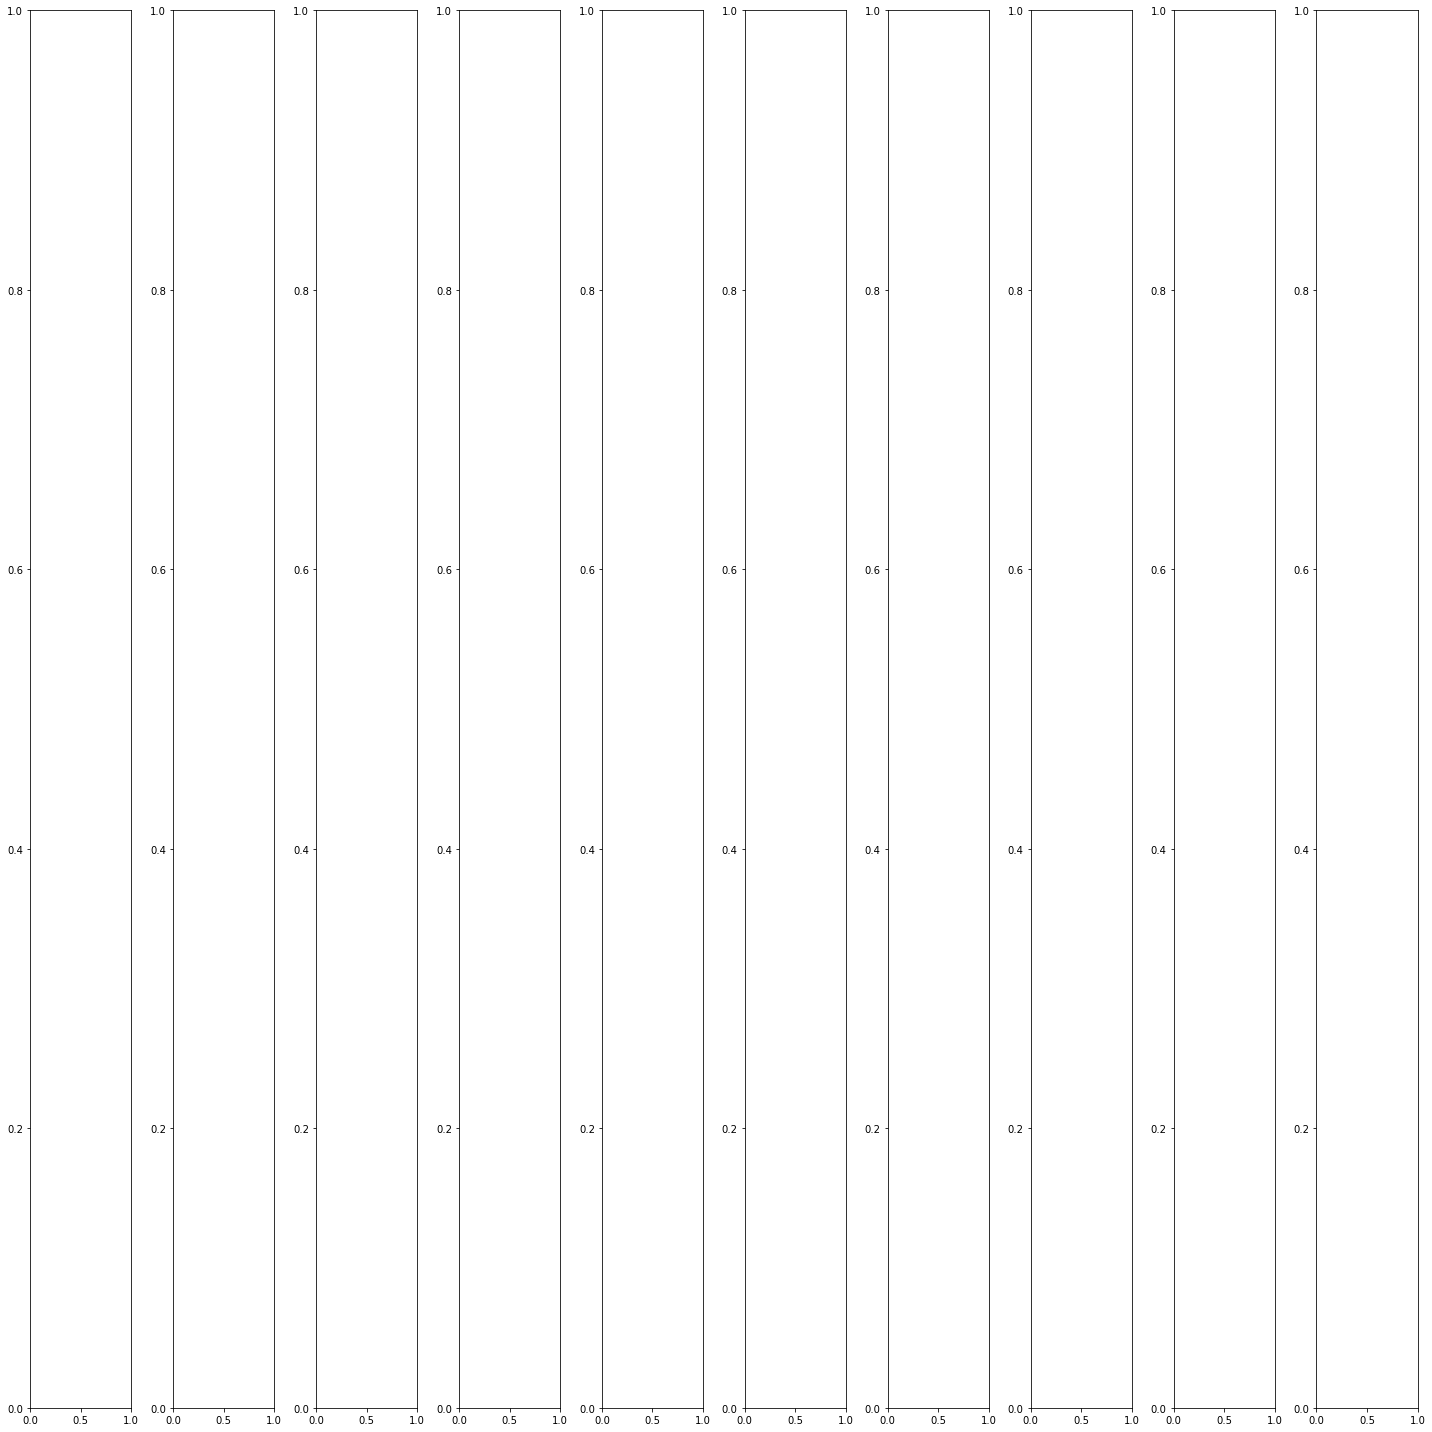

The labels for the above images are (in one-hot encoded format):
[]


In [6]:
# Get the next batch of images and labels from the training set
imgs, labels = next(train_batches)

# Plot the images using the previously defined function
plotImages(imgs)

# Print the labels corresponding to the images
# These labels are in one-hot encoded format
print("The labels for the above images are (in one-hot encoded format):")
print(labels)


## Defining Model

In [7]:
# Initialize a Sequential model
model = Sequential([
    # Add a Convolutional layer with 16 filters of size 5x5, ReLU activation function, 
    # 'same' padding (output size = input size) and input shape of 32x32 with 3 channels
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(32,32,3)),
    
    # Add another Convolutional layer with 16 filters of size 3x3 and ReLU activation function
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'),
    
    # Add a Batch Normalization layer to normalize the activations of the previous layer
    BatchNormalization(),
    
    # Add a Max Pooling layer with pool size of 2x2 and strides of 2 to reduce the spatial dimensions
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    # Repeat the same structure of layers but with increasing number of filters in Convolutional layers
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),    
    Dropout(0.2),  # Add a Dropout layer after Max Pooling to prevent overfitting
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    # Flatten the tensor output by the previous layer
    Flatten(),
    
    # Add a Dense layer with 512 units and ReLU activation function
    Dense(512, activation = 'relu'),
    
    Dropout(0.5),  # Add a Dropout layer after Dense layer to prevent overfitting

    # Add a Dense output layer with 100 units (for 100 classes) and softmax activation function
    Dense(units=100, activation='softmax')
])

# Print the summary of the model architecture
print(model.summary())

# Compile the model with Adam optimizer (with learning rate of 0.0001), 
# categorical crossentropy as the loss function (suitable for multi-class classification) 
# and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau
# Define the filepaths for saving the weights of the model after each epoch
# The weights are saved in HDF5 format
filepath1="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath2 = "best_weights.hdf5"

# Define ModelCheckpoint callbacks to save the weights
# The weights are saved only when the validation accuracy improves
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#  List of callbacks to apply during training
callbacks_list = [checkpoint1,checkpoint2]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9

## Training Data

In [21]:
# Fit the model to the training data
# 'train_batches' is the training data
# 'valid_batches' is the validation data
# The model will train for 100 epochs
# 'verbose=1' means the training process will print out metrics after each epoch
# 'callbacks_list' is a list of callbacks to apply during training
# The training process will return a 'History' object which we store in 'history'
# The 'History' object has a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values (if applicable)
history = model.fit(
    train_batches, 
    validation_data = valid_batches, 
    epochs = 100, 
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/100
415/415 [==============================] - ETA: 0s - loss: 1.8471 - accuracy: 0.3817
Epoch 00001: val_accuracy improved from -inf to 0.29667, saving model to weights-improvement-01-0.30.hdf5

Epoch 00001: val_accuracy improved from -inf to 0.29667, saving model to best_weights.hdf5
415/415 [==============================] - 71s 171ms/step - loss: 1.8471 - accuracy: 0.3817 - val_loss: 1.9002 - val_accuracy: 0.2967
Epoch 2/100
415/415 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.5229
Epoch 00002: val_accuracy improved from 0.29667 to 0.62500, saving model to weights-improvement-02-0.62.hdf5

Epoch 00002: val_accuracy improved from 0.29667 to 0.62500, saving model to best_weights.hdf5
415/415 [==============================] - 62s 150ms/step - loss: 1.3836 - accuracy: 0.5229 - val_loss: 1.0494 - val_accuracy: 0.6250
Epoch 3/100
415/415 [==============================] - ETA: 0s - loss: 1.1211 - accuracy: 0.6253
Epoch 00003: val_accuracy did not impro

Epoch 22/100
415/415 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.9125
Epoch 00022: val_accuracy did not improve from 0.90167

Epoch 00022: val_accuracy did not improve from 0.90167
415/415 [==============================] - 60s 144ms/step - loss: 0.2604 - accuracy: 0.9125 - val_loss: 0.4874 - val_accuracy: 0.8367
Epoch 23/100
415/415 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.9166
Epoch 00023: val_accuracy did not improve from 0.90167

Epoch 00023: val_accuracy did not improve from 0.90167
415/415 [==============================] - 60s 143ms/step - loss: 0.2232 - accuracy: 0.9166 - val_loss: 0.4536 - val_accuracy: 0.8500
Epoch 24/100
415/415 [==============================] - ETA: 0s - loss: 0.2302 - accuracy: 0.9207
Epoch 00024: val_accuracy did not improve from 0.90167

Epoch 00024: val_accuracy did not improve from 0.90167
415/415 [==============================] - 60s 145ms/step - loss: 0.2302 - accuracy: 0.9207 - val_loss: 0

Epoch 45/100
415/415 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9588
Epoch 00045: val_accuracy did not improve from 0.93333

Epoch 00045: val_accuracy did not improve from 0.93333
415/415 [==============================] - 62s 149ms/step - loss: 0.1300 - accuracy: 0.9588 - val_loss: 0.3785 - val_accuracy: 0.8967
Epoch 46/100
415/415 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9545
Epoch 00046: val_accuracy did not improve from 0.93333

Epoch 00046: val_accuracy did not improve from 0.93333
415/415 [==============================] - 63s 151ms/step - loss: 0.1275 - accuracy: 0.9545 - val_loss: 0.4361 - val_accuracy: 0.8883
Epoch 47/100
415/415 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9578
Epoch 00047: val_accuracy did not improve from 0.93333

Epoch 00047: val_accuracy did not improve from 0.93333
415/415 [==============================] - 62s 148ms/step - loss: 0.1155 - accuracy: 0.9578 - val_loss: 0

Epoch 69/100
415/415 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 0.9708
Epoch 00069: val_accuracy did not improve from 0.94333

Epoch 00069: val_accuracy did not improve from 0.94333
415/415 [==============================] - 67s 162ms/step - loss: 0.0872 - accuracy: 0.9708 - val_loss: 0.3016 - val_accuracy: 0.9083
Epoch 70/100
415/415 [==============================] - ETA: 0s - loss: 0.0911 - accuracy: 0.9735
Epoch 00070: val_accuracy did not improve from 0.94333

Epoch 00070: val_accuracy did not improve from 0.94333
415/415 [==============================] - 64s 155ms/step - loss: 0.0911 - accuracy: 0.9735 - val_loss: 0.3039 - val_accuracy: 0.9050
Epoch 71/100
415/415 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9742
Epoch 00071: val_accuracy did not improve from 0.94333

Epoch 00071: val_accuracy did not improve from 0.94333
415/415 [==============================] - 64s 153ms/step - loss: 0.0741 - accuracy: 0.9742 - val_loss: 0

Epoch 93/100
415/415 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9740
Epoch 00093: val_accuracy did not improve from 0.95000

Epoch 00093: val_accuracy did not improve from 0.95000
415/415 [==============================] - 65s 157ms/step - loss: 0.0757 - accuracy: 0.9740 - val_loss: 0.2449 - val_accuracy: 0.9367
Epoch 94/100
415/415 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9802
Epoch 00094: val_accuracy did not improve from 0.95000

Epoch 00094: val_accuracy did not improve from 0.95000
415/415 [==============================] - 64s 154ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 0.2256 - val_accuracy: 0.9483
Epoch 95/100
415/415 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9800
Epoch 00095: val_accuracy did not improve from 0.95000

Epoch 00095: val_accuracy did not improve from 0.95000
415/415 [==============================] - 63s 152ms/step - loss: 0.0674 - accuracy: 0.9800 - val_loss: 0

## Testing model on our Test images

In [42]:
# Use the trained model to make predictions on the test set
# 'test_batches' is the test data
# 'steps=len(test_batches)' means the prediction process will run for a number of steps equal to the total number of batches in the test set
# 'verbose=0' means the prediction process will not print out any progress messages
# The prediction process will return an array of predictions which we store in 'predictions'
predictions = model.predict(
    x=test_batches, 
    steps=len(test_batches), 
    verbose=0
)

In [43]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Function to print and plot the confusion matrix.
    
    Parameters:
    cm : array-like
        The confusion matrix.
    classes : list
        The list of class labels.
    normalize : bool, optional
        Whether to normalize the confusion matrix. Default is False.
    title : str, optional
        The title of the plot. Default is 'Confusion matrix'.
    cmap : colormap, optional
        The colormap to be used. Default is 'Blues'.
    """
    
    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set the title of the plot
    plt.title(title)
    
    # Display a colorbar
    plt.colorbar()
    
    # Create tick marks at each class label
    tick_marks = np.arange(len(classes))
    
    # Label the x-axis with the class labels, rotated 45 degrees
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Label the y-axis with the class labels
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Print the confusion matrix
    print(cm)
    
    # Determine the threshold for coloring the text
    thresh = cm.max() / 2.
    
    # Loop over each cell in the confusion matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Add the value of the cell as text in the center of the cell
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    # Adjust the layout to fit everything
    plt.tight_layout()
    
    # Label the y-axis
    plt.ylabel('True label')
    
    # Label the x-axis
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 44  66  46 102  35  62 115  38  88  42  80  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


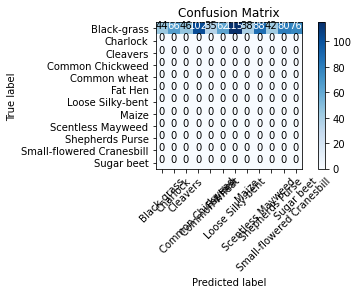

In [45]:
# Compute the confusion matrix
# 'y_true=test_batches.classes' are the true labels
# 'y_pred=np.argmax(predictions, axis=-1)' are the predicted labels
# 'np.argmax(predictions, axis=-1)' returns the indices of the maximum values along an axis
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

# List of class labels for the confusion matrix
cm_plot_labels = ['Black-grass', 'Charlock', 'Cleavers',
        'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
        'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

# Plot the confusion matrix using the previously defined function
# 'cm=cm' is the confusion matrix to be plotted
# 'classes=cm_plot_labels' are the class labels
# 'title='Confusion Matrix'' is the title of the plot
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [48]:
print(f'It seems that the test data might have incorrect labels. You can verify the data on Kaggle using the following link: {link}')


I think that the test data has wrong labels. You can check the data on kaggle: https://www.kaggle.com/c/plant-seedlings-classification/data
